In [211]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [212]:
tickerSymbol = 'TATAPOWER.NS'
tickerData = yf.Ticker(tickerSymbol)

In [213]:
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2024-8-7')

In [214]:
orignal_df=tickerDf.copy()

In [215]:
tickerDf.reset_index(inplace=True)

In [216]:
tickerDf['year'] = tickerDf['Date'].dt.year
tickerDf['month'] = tickerDf['Date'].dt.month
tickerDf['day'] = tickerDf['Date'].dt.day
tickerDf['hour'] = tickerDf['Date'].dt.hour

In [217]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [218]:
from datetime import datetime

In [219]:
tickerDf['formatted_date'] = tickerDf.apply(lambda row: convert_to_date(f"{row['year']} {row['month']} {row['day']} {row['hour']}"), axis=1)

In [220]:
tickerDf['Date'] = pd.to_datetime(tickerDf['Date']).dt.date

In [221]:
tickerDf.set_index('formatted_date',inplace=True)

<Axes: xlabel='formatted_date'>

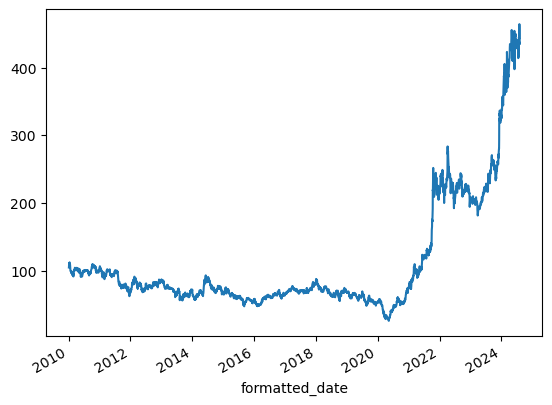

In [222]:
tickerDf['Close'].plot()

In [223]:
from matplotlib import pyplot
result = seasonal_decompose(tickerDf['Close'], model='additive', period=1)

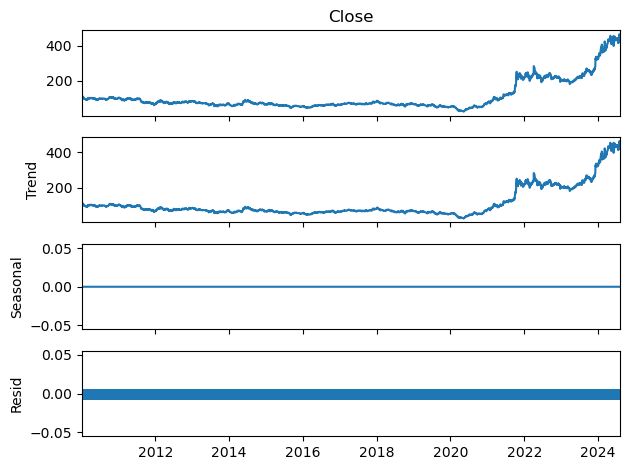

In [224]:
result.plot()
pyplot.show()

In [225]:
from statsmodels.tsa.stattools import adfuller

In [226]:
result=adfuller(tickerDf['Close'])

In [227]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.950219
p-value: 1.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


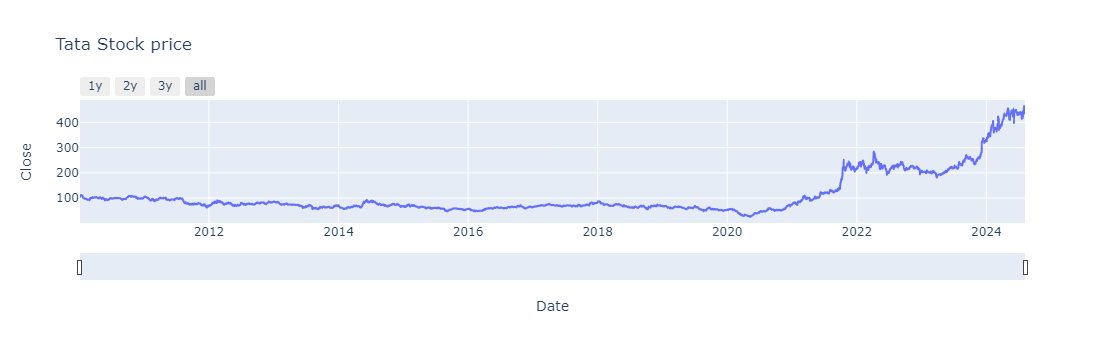

In [228]:
import plotly.express as px
fig = px.line(tickerDf, x='Date', y='Close', title='Tata Stock price')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [229]:
tickerDf['Close_diff'] = tickerDf['Close'].diff().dropna()

In [230]:
tickerDf.dropna(inplace=True)

In [231]:
tickerDf

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,hour,Close_diff
formatted_date,,,,,,,,,,,,,
2010-01-05,2010-01-05,104.985432,107.542378,104.756049,106.011971,4254349,0.0,0.0,2010,1,5,0,1.522888
2010-01-06,2010-01-06,106.038272,112.505856,106.038272,110.930321,8747201,0.0,0.0,2010,1,6,0,4.918350
2010-01-07,2010-01-07,111.302583,112.957076,108.670425,111.389069,5495560,0.0,0.0,2010,1,7,0,0.458748
2010-01-08,2010-01-08,111.678606,112.280234,110.159472,111.328896,3916987,0.0,0.0,2010,1,8,0,-0.060173
2010-01-11,2010-01-11,111.686154,114.137815,110.264789,111.302612,4785645,0.0,0.0,2010,1,11,0,-0.026283
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,2024-07-31,446.399994,455.000000,445.000000,453.600006,21227714,0.0,0.0,2024,7,31,0,9.500000
2024-08-01,2024-08-01,454.950012,465.850006,454.049988,464.399994,34019552,0.0,0.0,2024,8,1,0,10.799988
2024-08-02,2024-08-02,460.299988,471.000000,452.350006,460.350006,27534299,0.0,0.0,2024,8,2,0,-4.049988


In [232]:
result=adfuller(tickerDf['Close_diff'])

In [233]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.251309
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


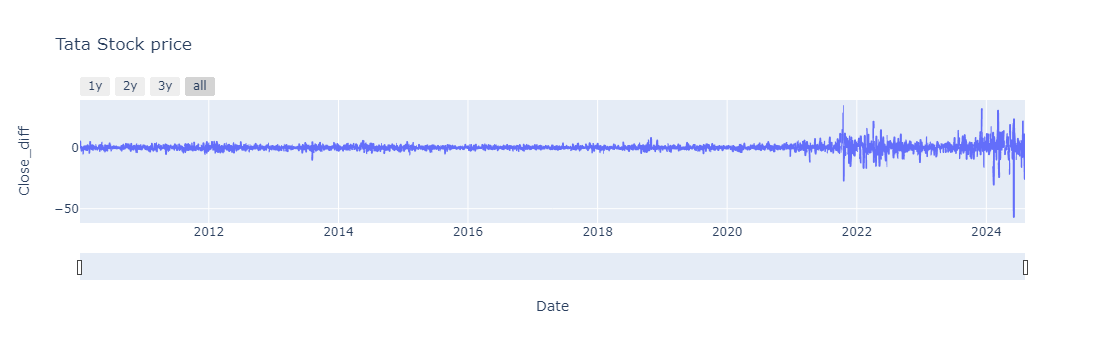

In [234]:
import plotly.express as px
fig = px.line(tickerDf, x='Date', y='Close_diff', title='Tata Stock price')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [235]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [236]:
series_diff=tickerDf['Close_diff']

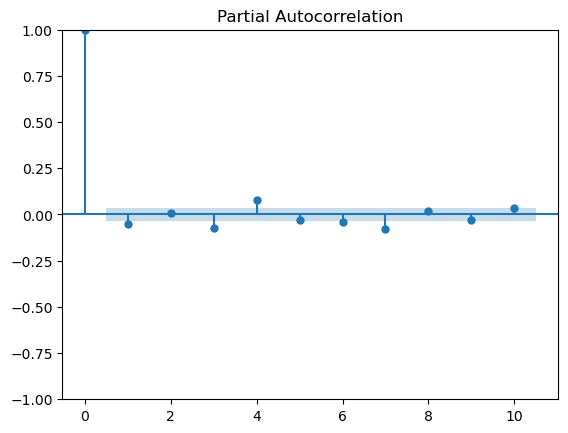

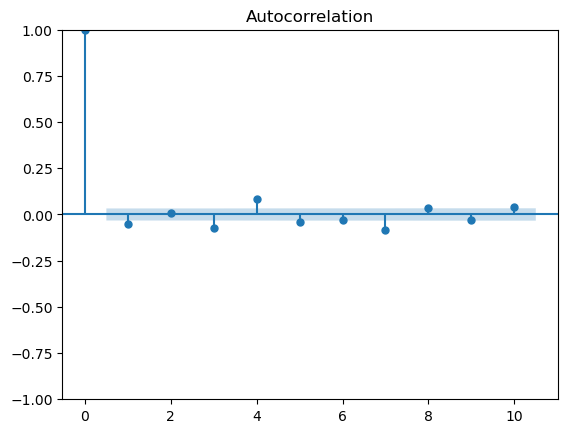

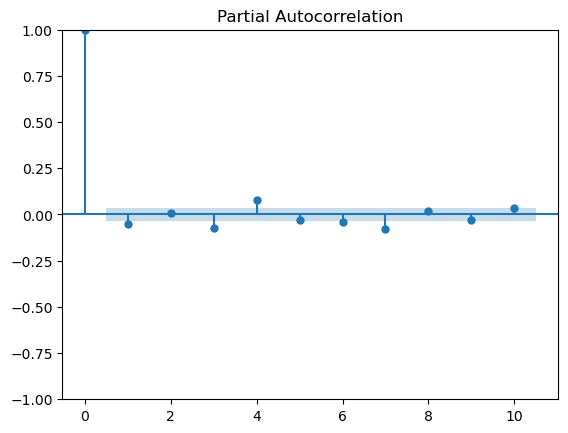

In [237]:
plot_acf(series_diff, lags=10)
plot_pacf(series_diff, lags=10)

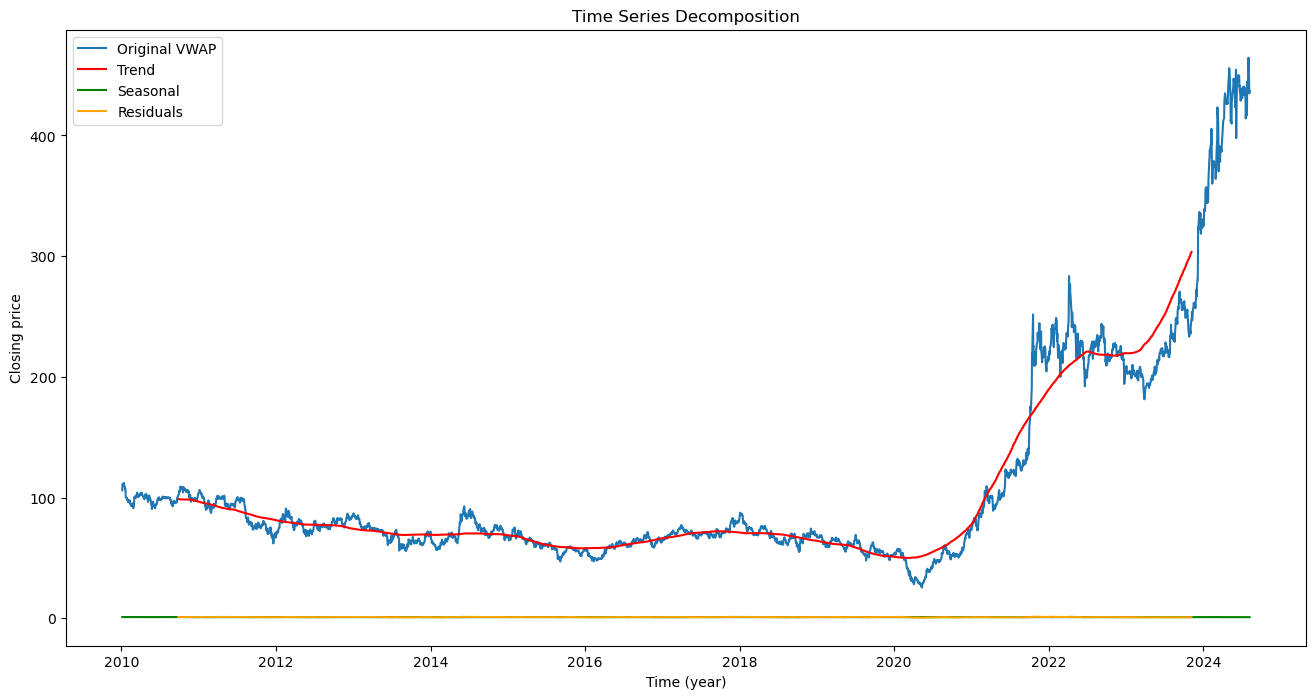

In [238]:
# Assuming df_vwap is your DataFrame with the VWAP data
# Perform seasonal decomposition
import matplotlib.pyplot as plt
result = seasonal_decompose(tickerDf['Close'], model='multiplicative',period=365)
# Assuming daily data with 252 trading days in a year

# Plot the original time series data
plt.figure(figsize=(16, 8))
plt.plot(tickerDf['Close'], label='Original VWAP')

# Plot the trend component
plt.plot(result.trend, label='Trend', color='red')

# Plot the seasonal component
plt.plot(result.seasonal, label='Seasonal', color='green')

# Plot the re
plt.plot(result.resid, label='Residuals', color='orange')

plt.title('Time Series Decomposition')
plt.xlabel("Time (year)")
plt. ylabel ("Closing price")
plt.legend(loc='best')
plt.show()

<Axes: xlabel='year'>

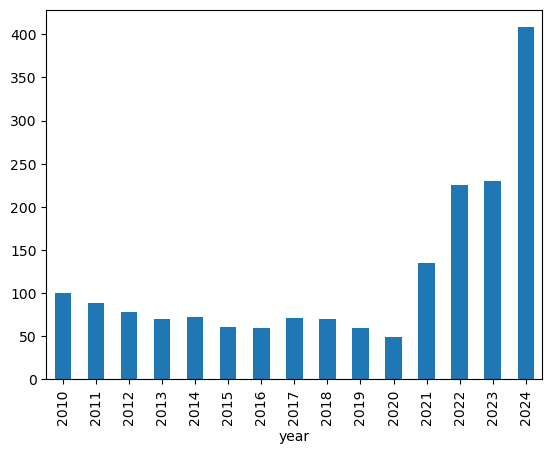

In [239]:
tickerDf.groupby('year')['Close'].mean().plot.bar()

<Axes: xlabel='month'>

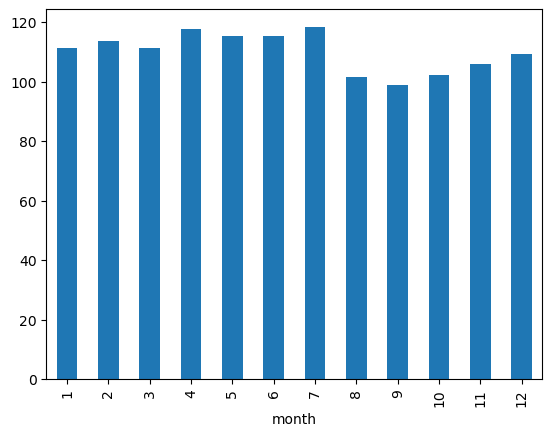

In [240]:
tickerDf.groupby('month')['Close'].mean().plot.bar()

In [241]:
monthly_df = orignal_df.resample('M').mean()

<Axes: xlabel='Date'>

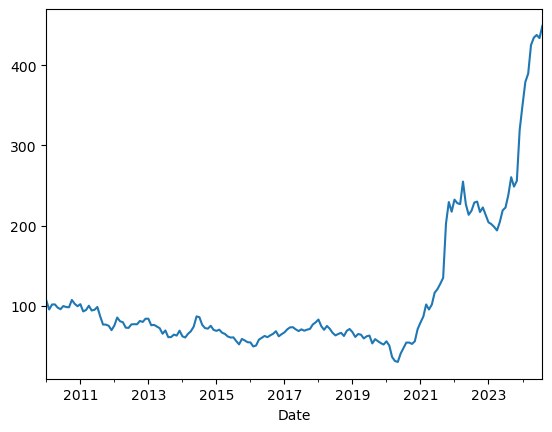

In [242]:
monthly_df['Close'].plot()

In [243]:
series=monthly_df['Close']

In [244]:
train_size=int(len(series)*0.80)

In [245]:
train_data,test_data=series[0:train_size],series[train_size:]

In [246]:
start=len(train_data)

In [247]:
end=len(train_data)+len(test_data)-1

In [248]:
from statsmodels.tsa.arima.model import ARIMA

In [249]:
model=ARIMA(train_data,order=(4,1,4))

In [250]:
model_fit=model.fit()

In [251]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  140
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -423.312
Date:                Wed, 07 Aug 2024   AIC                            864.623
Time:                        15:49:20   BIC                            891.033
Sample:                    01-31-2010   HQIC                           875.356
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1785      0.495      0.361      0.718      -0.792       1.149
ar.L2         -0.1823      0.255     -0.716      0.474      -0.681       0.317
ar.L3          0.2488      0.292      0.851      0.395      -0.324       0.822
ar.L4          0.4254      0.261      1.632      0.103      -0.085       0.936
ma.L1         -0.0032      0.484     -0.007      0.995      -0.953       0.946
ma.L2          0.1196      0.305      0.392      0.695      -0.478       0.717
ma.L3          0.0401      0.309      0.130      0.897      -0.565       0.645
ma.L4         -0.5770      0.329     -1.753      0.080      -1.222       0.068
sigma2        25.7723      3.557      7.246      0.000      18.802      32.743
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.91   Prob(JB):                         0.91
Heteroskedasticity (H):               1.45   Skew:                            -0.03
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

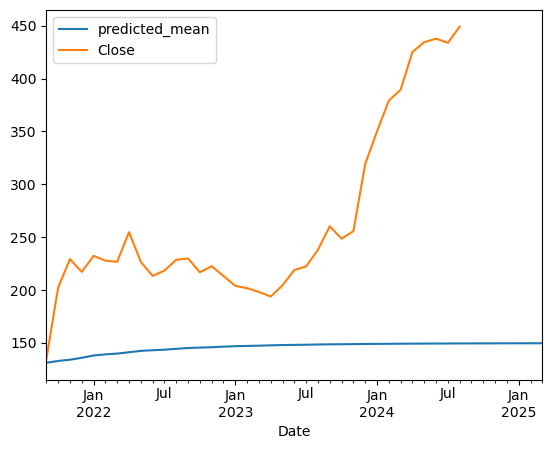

In [252]:
model_pred.plot(legend=True)
test_data.plot(legend=True)

In [253]:
test_data.tail()

Date
2024-04-30 00:00:00+05:30    425.190845
2024-05-31 00:00:00+05:30    434.464084
2024-06-30 00:00:00+05:30    437.743758
2024-07-31 00:00:00+05:30    433.872636
2024-08-31 00:00:00+05:30    449.062500
Freq: M, Name: Close, dtype: float64

In [254]:
forcast_steps=12
forecast=model_fit.get_forecast(steps=forcast_steps)
forecast_index=pd.date_range(start='2024-08-31',periods=forcast_steps,freq='M')

In [257]:
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [261]:
forecast_series

2024-08-31   NaN
2024-09-30   NaN
2024-10-31   NaN
2024-11-30   NaN
2024-12-31   NaN
2025-01-31   NaN
2025-02-28   NaN
2025-03-31   NaN
2025-04-30   NaN
2025-05-31   NaN
2025-06-30   NaN
2025-07-31   NaN
Freq: M, Name: predicted_mean, dtype: float64

In [207]:
daily_forecast = forecast_series.resample('D').interpolate(method='linear')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19036\978356587.py:1: FutureWarning:

Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [208]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Combine actual and forecast data
actual_and_forecast = pd.concat([test_data, daily_forecast], axis=1)
actual_and_forecast.columns = ['Actual', 'Forecast']

# Plot the actual and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(daily_forecast, label='Forecast')
plt.legend()
plt.show()

# Calculate RMSE
rmse = mean_squared_error(test_data, daily_forecast[:len(test_data)], squared=False)
print(f'Root Mean Squared Error: {rmse}')


TypeError: Cannot join tz-naive with tz-aware DatetimeIndex

In [153]:
model_pred=model_fit.predict(start=start,end=end+1,type='levels')

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [262]:
model_pred

2021-09-30 00:00:00+05:30    131.258919
2021-10-31 00:00:00+05:30    132.923173
2021-11-30 00:00:00+05:30    134.090044
2021-12-31 00:00:00+05:30    135.912769
2022-01-31 00:00:00+05:30    138.108349
2022-02-28 00:00:00+05:30    139.166127
2022-03-31 00:00:00+05:30    139.904450
2022-04-30 00:00:00+05:30    141.164952
2022-05-31 00:00:00+05:30    142.452434
2022-06-30 00:00:00+05:30    143.086047
2022-07-31 00:00:00+05:30    143.592061
2022-08-31 00:00:00+05:30    144.423354
2022-09-30 00:00:00+05:30    145.184771
2022-10-31 00:00:00+05:30    145.564520
2022-11-30 00:00:00+05:30    145.915537
2022-12-31 00:00:00+05:30    146.451997
2023-01-31 00:00:00+05:30    146.902115
2023-02-28 00:00:00+05:30    147.133508
2023-03-31 00:00:00+05:30    147.375520
2023-04-30 00:00:00+05:30    147.716710
2023-05-31 00:00:00+05:30    147.982520
2023-06-30 00:00:00+05:30    148.126394
2023-07-31 00:00:00+05:30    148.291441
2023-08-31 00:00:00+05:30    148.505932
2023-09-30 00:00:00+05:30    148.662988


In [263]:
from sklearn.metrics import mean_absolute_error

In [265]:
mae=mean_absolute_error(model_pred,test_data)
print(mae)

ValueError: Found input variables with inconsistent numbers of samples: [43, 36]

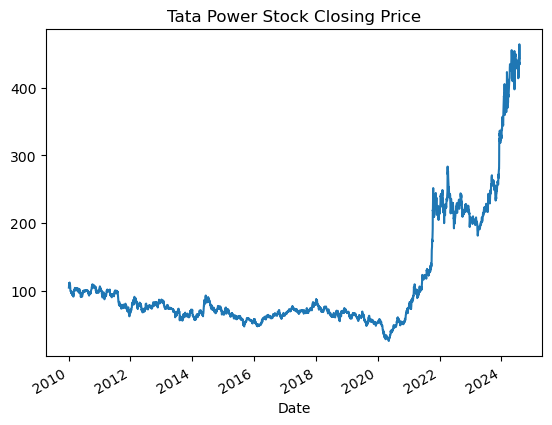

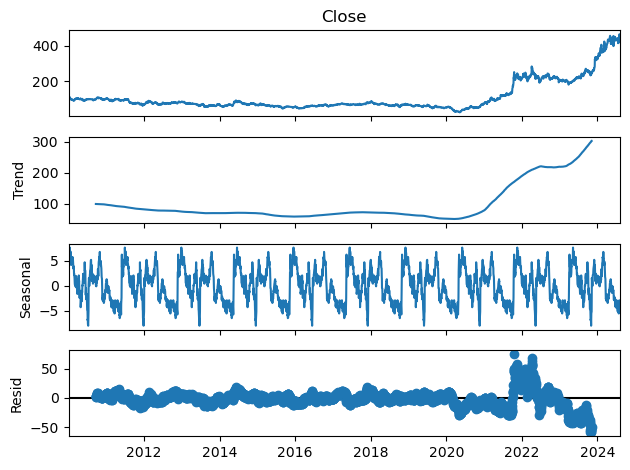

ADF Statistic: 2.950219
p-value: 1.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
ADF Statistic (Differenced): -11.251309
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


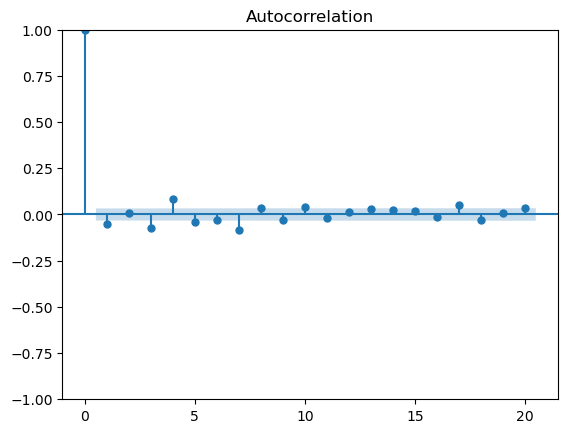

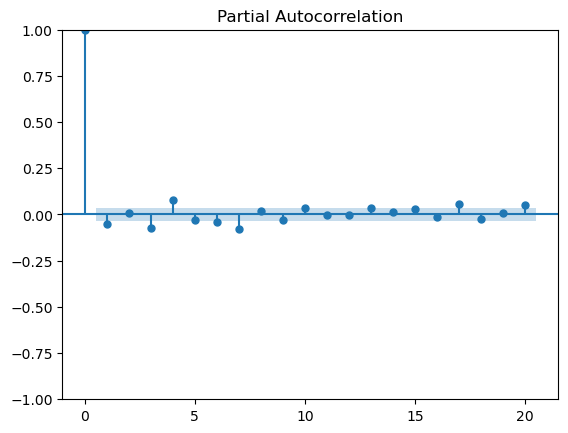

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  140
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -423.352
Date:                Wed, 07 Aug 2024   AIC                            864.704
Time:                        15:47:30   BIC                            891.115
Sample:                    01-31-2010   HQIC                           875.437
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1774      0.494      0.359      0.719      -0.790       1.145
ar.L2         -0.1822      0.254     -0.716      0.474      -0.681       0.316
ar.L3          0.2489      0.292      0.853      0.3

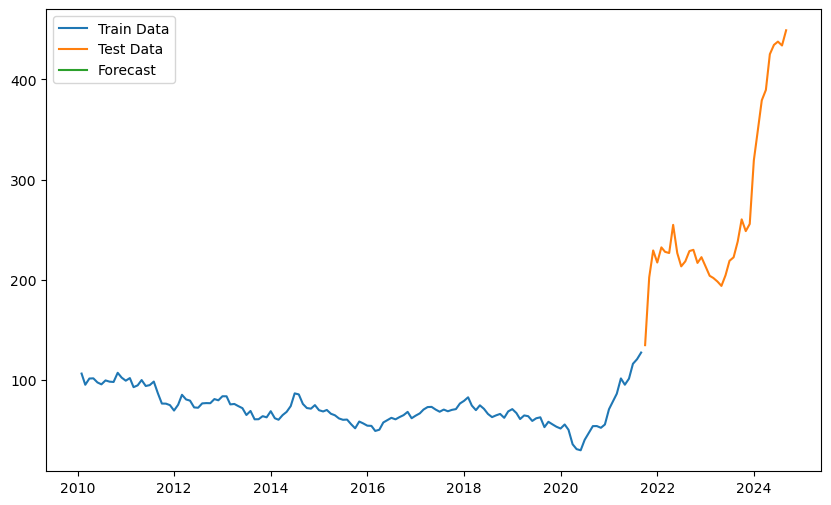

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



ValueError: Found input variables with inconsistent numbers of samples: [36, 12]

In [210]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the data
tickerSymbol = 'TATAPOWER.NS'
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2024-8-7')
tickerDf.reset_index(inplace=True)

# Extract date components
tickerDf['year'] = tickerDf['Date'].dt.year
tickerDf['month'] = tickerDf['Date'].dt.month
tickerDf['day'] = tickerDf['Date'].dt.day
tickerDf['hour'] = tickerDf['Date'].dt.hour

# Plot the closing price
tickerDf.set_index('Date', inplace=True)
tickerDf['Close'].plot(title='Tata Power Stock Closing Price')
plt.show()

# Perform seasonal decomposition
result = seasonal_decompose(tickerDf['Close'], model='additive', period=365)
result.plot()
plt.show()

# Perform ADF test on the original series
result = adfuller(tickerDf['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Differencing to make the series stationary
tickerDf['Close_diff'] = tickerDf['Close'].diff().dropna()
tickerDf.dropna(inplace=True)

# Perform ADF test on the differenced series
result = adfuller(tickerDf['Close_diff'])
print('ADF Statistic (Differenced): %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot ACF and PACF
plot_acf(tickerDf['Close_diff'], lags=20)
plot_pacf(tickerDf['Close_diff'], lags=20)
plt.show()

# Train-test split
monthly_df = tickerDf.resample('M').mean()
series = monthly_df['Close']
train_size = int(len(series) * 0.80)
train_data, test_data = series[0:train_size], series[train_size:]
start = len(train_data)
end = len(train_data) + len(test_data) - 1

# ARIMA model
model = ARIMA(train_data, order=(4, 1, 4))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=series.index[-1], periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Interpolate daily values
daily_forecast = forecast_series.resample('D').interpolate(method='linear')

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(daily_forecast, label='Forecast')
plt.legend()
plt.show()

# Calculate RMSE
rmse = mean_squared_error(test_data, forecast_series[:len(test_data)], squared=False)
print(f'Root Mean Squared Error: {rmse}')
